# Title:

by David Schneemann

## Project Goal

My goal with this project is to identify Telco's key drivers of customer churn and to provide insight into why and how these factors are producing churn. With this information and the following recommendations, our organization can work together to improve business processes and procedures in order to minimize customer churn moving forward.

## Project Description

Losing customers, expressed as churn, is a real issue for the Telco Co. 

In today's business world, the cost of acquiring customers can be steep. Thus, businesses are seeking ways to retain the customers they already have through providing more options to consumers that can meet the needs of a diverse customer population. 

In order to meet the desire for customer retention at Telco Co., we will analyze the attributes (features) of customers who are more or less likely to churn. We will then develop models for predicting churn based on these attributes and provide recommendations and predictions to Telco for reducing churn and predicting churn for their customer base moving forward.

## Initial Questions

##### 1. Do M2m customers churn more than 1-yr or 2-yr customers?
    
- Ho = M2M customers churn <= 1&2-yr customers
- Ha = M2M customers churn > 1&2-yr customers

##### 2. Does paying by electronic check influence churn?

- Ho = Electronic check churn <= other payment types
- Ha = Electronic check churns > other payment types

##### 3. Do customers with Fiber churn more than other internet service types?

- Ho = Fiber internet churn <= DSL or no internet churn
- Ha = Fiber internet churn > DSL or no internet churn

##### 4. Do adults with dependents churn more than adults without dependents?

- Ho = Adults with dependents churn <= adults without dependents
- Ha = Adults with dependents churn > adults without dependents

## Data Dictionary

In order to effectively meet our goals, the following module imports are required. \
Below is an extensive list of all modules I imported and used to create and complete the desired analysis for Telco Co.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model

# Data acquisition
from pydataset import data

# Data statistics & modeling
from scipy import stats
from model import map_setosa_knn, train_validate_test_split

# Data
import prepare
import env
import prepare
import model
import acquire_telco
import split_telco

| Variable      | Meaning |
| ----------- | ----------- |
| Churn      | Defines whether a customer left their service contract       |
| Monthly Charges   | The average monthly charge per customer        |
| m2m      | Customers who have month to month contracts       |
| yr1      | Customers who have 1-yr contracts       |
| yr2      | Customers who have 1-yr contracts       |
| a_bank_transfer   | Customers who pay via bank transfer (automatic)       |
| a_ccard      | Customers who pay via credit card (automatic)      |
| e_check      | Customers who pay via electronic check       |
| m_check      | Customers who pay via mailed check       |
| p_w_d   | Defines customers who have both a partner and dependents        |
| p_no_d      | Defines customers who have a partner but no dependents|
| d_no_p      | Defines customers who have dependents but no partner  |
| no_pod      | Defines customers who have neither a partner nor dependents       |

## Wrangle Telco Data

To acquire the telco data, I used the telco_db in our mySQL server. I selected all columns from the customers table. I then joined this table with the contract_type, payment_type, and internet_service_type tables.

In [2]:
# py file to acquire data from sql database telco_db
import acquire_telco

# Utilizing our py file function 'get_telco_data' to return our table in the form of a dataframe
df = acquire_telco.get_telco_data()
df.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,...,2,65.6,593.3,No,2,One year,2,Mailed check,1,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,...,2,59.9,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,...,1,73.9,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,...,1,98.0,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,...,2,83.9,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic


To clean the data, I did the following:

1. Drop Duplicate Columns: "id" columns such as 'payment_type_id' are duplicates and don't serve a purpose in our table, thus I removed them.
2. Transforming numerical variables: 'total_charges' has whitespace removed and is converted into the appropriate datatype
3. Encoding binary categorical variables: Variables like 'gender', 'partner', and 'dependents' (among others) need to be encoded numerically for exploration and analysis purposes
4. Dummy vars: I attained dummy variables for 'multiple_lines',security choices, streaming choices, and other variables such as 'contract_type'.
5. Concatenate dummy df with original df: I concat our df to include our dummy variables
6. Feature engineering: In order to perform proper exploration and analysis, I create additional features that break down existing variables into more concise values that pinpoint potential causes of churn

In [3]:
# I acquire my prepare.py file, this file includes data cleaning instructions
import prepare

In [4]:
# Utilizing our py file function 'prep_telco_data' to return our dataframe tidy and clean 
df = prepare.prep_telco_data(df)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,partner_w_dependents,partner_no_dependents,dependents_no_partner,no_pod,male_w_dependents,female_w_dependents,number_relationships
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,0,1,1,0,0,0,0,0,2
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,1,0,0,0,1,0,0,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,0,0,0,0,1,0,0,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,0,1,0,0,1,0,0,0,0,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,0,1,0,1,0,0,0,0,1


For simplicity, I have separated my 'prepare' and 'split' files. My 'split' file includes functions that split our dataset into train, validate, and test dataframes that allow appropriate statistical analysis.

In [5]:
# acquiring and implementing my 'split' py file and accompanying function
import split_telco

# calling the function and applying it to our df
train, validate, test = split_telco.telco_split_explore(df)

In [6]:
# confirming data is properly wrangled, cleaned, and split
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,partner_w_dependents,partner_no_dependents,dependents_no_partner,no_pod,male_w_dependents,female_w_dependents,number_relationships
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,1,0,0,0,0,0,1,0,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,1,0,0,0,0,1,0,1,0,1
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,0,0,0,2
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,0,1,1,0,0,0,0,0,2
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,1,0,0,0,1,0,0,0


## Set the Data Context

Our dataset contains customer information from the Telco Company.

26.6% of customers churned. We have data from 7032 customers, 3875 of which are month to month customers, 2365 of which payed by electronic check, and 3280 of which are single adults (no partner or dependents). The average monthly charge for all customers was $64.80.

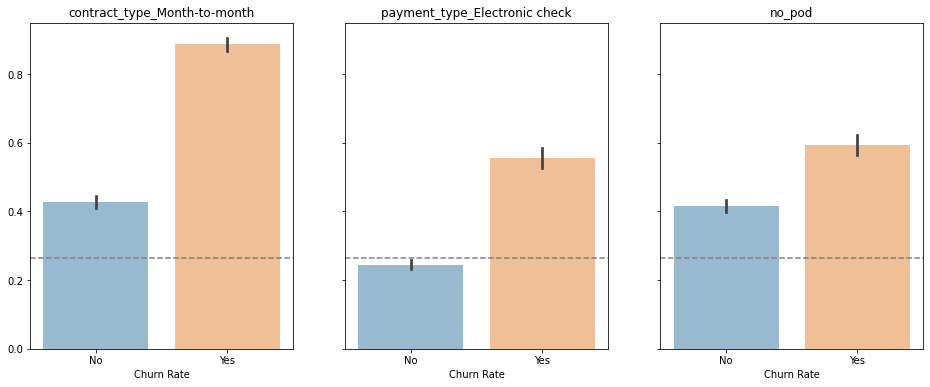

In [7]:
# My visualization setting the context of the data
# This visual shows churn rate of the three most prominent features I explore
features = ['contract_type_Month-to-month', 'payment_type_Electronic check', 'no_pod']

enumerate(features)

list(enumerate(features))

churn_rate = train.churn_encoded.mean()
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot('churn', feature, data=train
                , ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Churn Rate')
    ax[i].set_ylabel('')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

## Exploratory Analysis: [question]

I have answered these questions:

1. Do M2m customers churn more than 1-yr or 2-yr customers?
2. Does paying by electronic check influence churn?
3. Do customers with Fiber churn more than other internet service types?
4. Do adults with dependents churn more than adults without dependents?

### Question 1

Do M2m customers churn more than 1-yr or 2-yr customers? \
If so, what are potential underlying causes of this high churn rate?

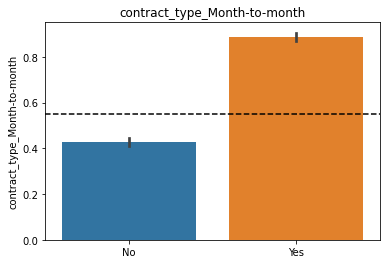

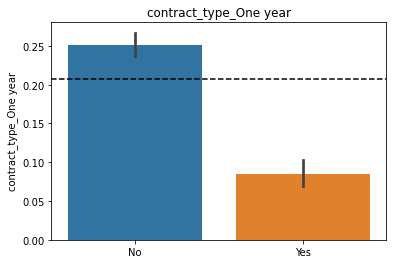

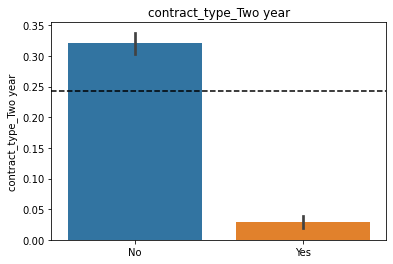

In [8]:
# Barplot expressing churn rate of customers by contract type: Month-to-Month, 1-yr, and 2-yr contracts
variables = ['contract_type_Month-to-month', 'contract_type_One year', 'contract_type_Two year']

mean = [train['contract_type_Month-to-month'].mean(), train['contract_type_One year'].mean(), train['contract_type_Two year'].mean()]

for x in range(0,3):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

In [9]:
# Chi-squared test determining whether Month-to-Month churn rate is statistically significant
m2m_stat = pd.crosstab(train['contract_type_Month-to-month'], train.churn_encoded)

print(m2m_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(m2m_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                    0    1
contract_type_Month-to-month           
0                             1653  119
1                             1238  927
We reject the null hypothesis and this variable is statistically significant


### Answer 1

Customers with Month-to-Month contracts are much more likely to churn compared to those with 1 or 2 year contracts.

### Question 2

Does paying by electronic check lead to a higher churn rate? \
If so, what are the potential underlying factors of this phenomenon?

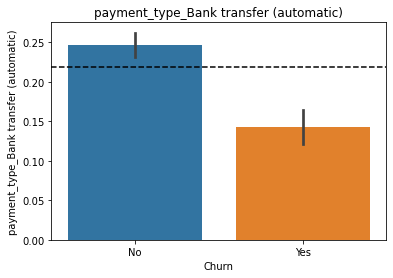

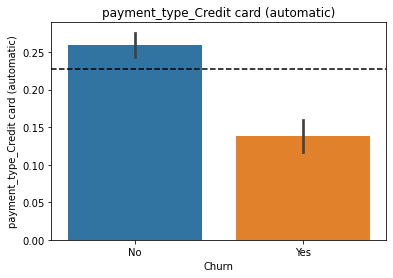

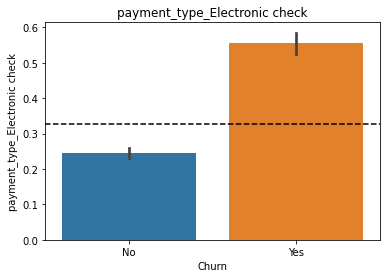

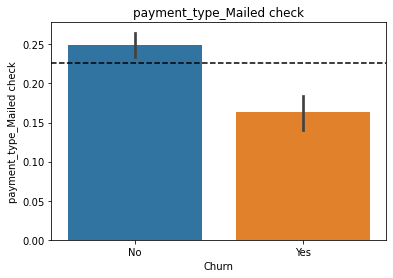

In [10]:
# Barplot expressing churn rate of customers by payment type: bank transfer, cc, e-check, mailed-check
variables = ['payment_type_Bank transfer (automatic)', 'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']

mean = [train['payment_type_Bank transfer (automatic)'].mean(), train['payment_type_Credit card (automatic)'].mean(), train['payment_type_Electronic check'].mean(), train['payment_type_Mailed check'].mean()]

for x in range(0,4):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('Churn')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

In [11]:
# Chi-squared test determining whether churn rate for customers who pay by electronic check is statistically significant
e_check_stat = pd.crosstab(train['payment_type_Electronic check'], train.churn_encoded)

print(e_check_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(e_check_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                     0    1
payment_type_Electronic check           
0                              2183  465
1                               708  581
We reject the null hypothesis and this variable is statistically significant


### Answer 2

Customers who pay by electronic check are more likely to churn than those who pay via alternative payments types. \
Additionally, those alternative payments show an opposing correlation and are also statistically significant (worth including in analysis).

### Question 3

Do customers with Fiber churn more than other internet service types?

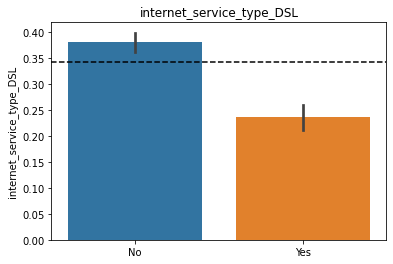

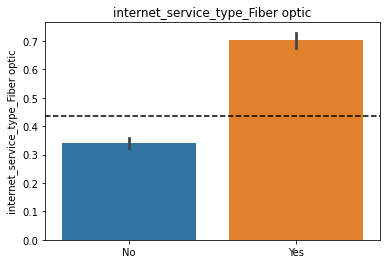

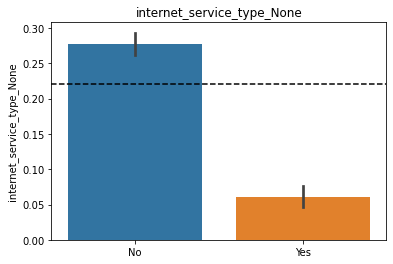

In [28]:
# Barplot expressing churn rate of customers by internet type: Fiber, DSL, or none
variables = ['internet_service_type_DSL', 'internet_service_type_Fiber optic', 'internet_service_type_None']

mean = [train['internet_service_type_DSL'].mean(), train['internet_service_type_Fiber optic'].mean(), train['internet_service_type_None'].mean()]

for x in range(0,3):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

In [103]:
# Chi-squared test determining whether churn rate for customers with DSL internet is statistically significant
dsl_stat = pd.crosstab(train['internet_service_type_DSL'], train.churn_encoded)

print(dsl_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(dsl_stat)

chi2, p

print('--------------------------------------')

print(f'p: {p}')

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                 0    1
internet_service_type_DSL           
0                          1790  799
1                          1101  247
--------------------------------------
p: 3.983806924956342e-17
We reject the null hypothesis and this variable is statistically significant


In [105]:
# Chi-squared test determining whether churn rate for customers with Fiber internet is statistically significant
fiber_stat = pd.crosstab(train['internet_service_type_Fiber optic'], train.churn_encoded)

print(fiber_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(fiber_stat)

chi2, p

print('--------------------------------------------')

print(f'p: {p}')

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                         0    1
internet_service_type_Fiber optic           
0                                  1904  311
1                                   987  735
--------------------------------------------
p: 2.831419548361709e-90
We reject the null hypothesis and this variable is statistically significant


In [106]:
# Chi-squared test determining whether churn rate for customers with NO internet is statistically significant
no_net_stat = pd.crosstab(train['internet_service_type_None'], train.churn_encoded)

print(no_net_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(no_net_stat)

chi2, p

print('--------------------------------------------')

print(f'p: {p}')

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                  0    1
internet_service_type_None           
0                           2088  982
1                            803   64
--------------------------------------------
p: 2.8653012180661676e-47
We reject the null hypothesis and this variable is statistically significant


### Answer 3

Customers with no partner or dependents are shown to be more likely to churn than customers with a partner but no dependents.

### Question 4

Are adults with dependents (d_no_p) more likely to churn than adults without dependents (no_pod)?

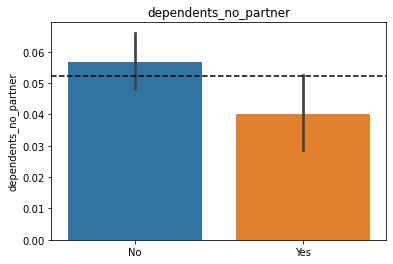

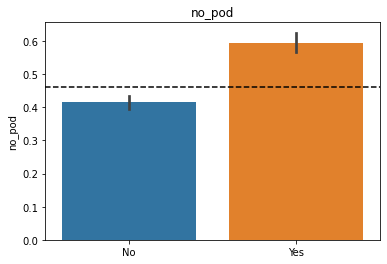

In [15]:
# Barplot expressing churn rate of customers by dependent status: Single Adults no dependents vs. Single Adults with dependents
variables = ['dependents_no_partner', 'no_pod']

mean = [train['dependents_no_partner'].mean(), train['no_pod'].mean()]

for x in range(0,2):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

In [29]:
# Chi-squared test determining whether churn rate for customers with no partner or dependents is statistically significant
no_pod_stat = pd.crosstab(train['no_pod'], train.churn_encoded)

print(no_pod_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(no_pod_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded     0    1
no_pod                  
0              1691  425
1              1200  621
We reject the null hypothesis and this variable is statistically significant


In [16]:
# Chi-squared test determining whether churn rate for customers with no partner or dependents is statistically significant
d_no_p_stat = pd.crosstab(train['dependents_no_partner'], train.churn_encoded)

print(d_no_p_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(d_no_p_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded             0     1
dependents_no_partner            
0                      2727  1004
1                       164    42
We reject the null hypothesis and this variable is statistically significant


In complement to our exploration of partner and dependent status, below I show how customers with a partner AND dependents (p_w_d) have an opposing correlation, making this feature statistically significant.


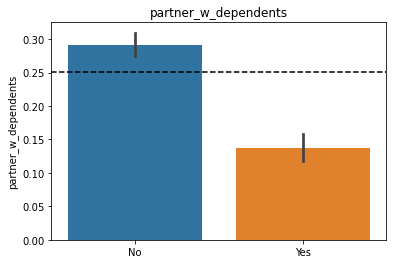

In [17]:
# Barplot expressing churn rate of customers with partner and dependents
variables = ['partner_w_dependents']

mean = [train['partner_w_dependents'].mean()]

for x in range(0,1):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

In [18]:
# Chi-squared test determining whether churn rate for customers with no partner or dependents is statistically significant
p_w_d_stat = pd.crosstab(train['partner_w_dependents'], train.churn_encoded)

print(p_w_d_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(p_w_d_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded            0    1
partner_w_dependents           
0                     2049  902
1                      842  144
We reject the null hypothesis and this variable is statistically significant


### Answer 4

Customers with no partner but with dependents (d_no_p) are NOT more likely to churn than adults without dependents (no_pod)? In fact, this customer group is statistically insignificant. \
In addition to no_pod being statistically significant as proven above, customers with dependents but no partner also expresse statistical significance.

### Summary: Who is most likely to churn?

[features i will move forward with]

## Predicting Churn

WRITE IN OWN WORDS: Because churn is a boolean/yes or no value, we will use classification machine learning algorithms to fit to our training data and we will evaluate on validate. We will pick the best model using accuracy because the data is mostly balanced, and the risk of an event happening balances the risk of getting a prediction wrong.



#### Baseline

I will now set a baseline prediction by predicting that all customers will not churn. Below, I evaluate the accuracy of this prediction.

In [19]:
# I create the variable `baseline`, setting all values equal to 0 (which indicates no churn).
train['baseline'] = 0

In [20]:
# I find the baseline accuracy by taking the mean of our prediction set against actual churn
baseline_accuracy = (train.churn_encoded == train.baseline).mean()

print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.43%


### Fit 3 models

In order to split our dataset into x & y train, validate, and test, I call the other function within my split_telco.py file:

In [21]:
# Calling my split function specific to modeling
x_train, y_train, x_validate, y_validate, x_test, y_test = split_telco.telco_split_model(df)

The top 3 models I built were:

- Random Forest
- KNN
- Logistic Regression

These models all used the same set of features and were looped to determine the optimal hyperparameters for maximum accuracy.

[best model] performed best with an accuracy of __%

#### Random Forest

In [23]:
metrics = []

for i in range(2, 25):
    # Making the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fitting the model (on train only)
    forest = forest.fit(x_train, y_train)

    # Using the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(x_train, y_train)
    
    # We now evaluate the model's performance on validate, to compare
    out_of_sample_accuracy = forest.score(x_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
## We now compile our metrics into a dataframe and create a column 
# showing the difference in our train and validate accuracy performance
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.734315,0.734005,0.000311
1,3,0.751588,0.760071,-0.008484
2,4,0.758192,0.760071,-0.001880
3,5,0.758192,0.760071,-0.001880
4,6,0.758192,0.760071,-0.001880
5,7,0.758192,0.760071,-0.001880
6,8,0.758192,0.760071,-0.001880
7,9,0.758192,0.760071,-0.001880
8,10,0.758192,0.760071,-0.001880
9,11,0.758192,0.760071,-0.001880


#### KNN

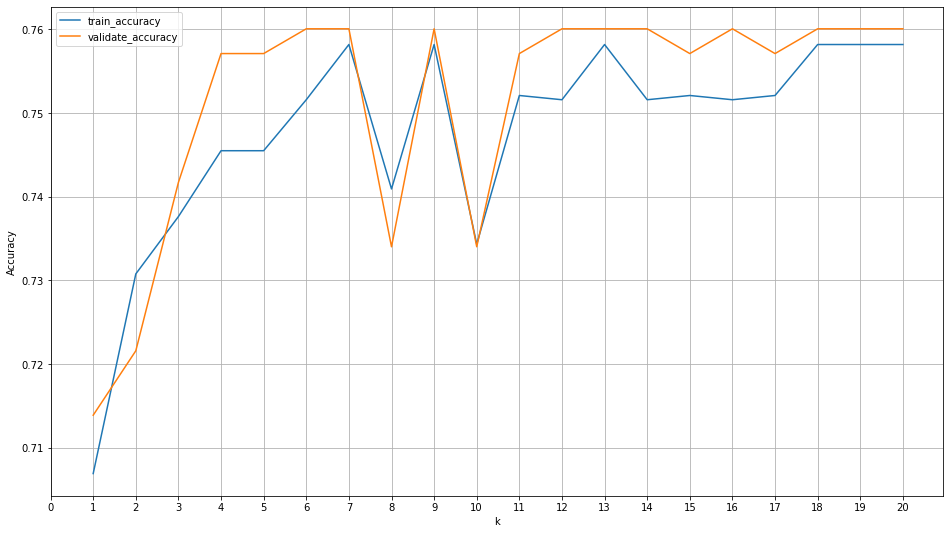

In [24]:
metrics = []

# Looping through different values of k
for k in range(1, 21):
            
    # Defining the model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fitting the model (only on training data)
    knn.fit(x_train, y_train)
    
    # Using the model to calculate accuracy on both train and validate
    train_accuracy = knn.score(x_train, y_train)
    validate_accuracy = knn.score(x_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

## We now compile our metrics into a dataframe 
results = pd.DataFrame(metrics)


# Additionally, we plot the data to more easily express 
# the difference in accuracy between our train and validate datasets
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [25]:
# Once again, creating this column showing the difference in our 
# train and validate accuracy performance
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,k,train_accuracy,validate_accuracy,difference
0,1,0.706883,0.713863,-0.006979
1,2,0.730759,0.721564,0.009195
2,3,0.737617,0.741706,-0.004089
3,4,0.745491,0.757109,-0.011618
4,5,0.745491,0.757109,-0.011618
5,6,0.751588,0.760071,-0.008484
6,7,0.758192,0.760071,-0.001880
7,8,0.740919,0.734005,0.006915
8,9,0.758192,0.760071,-0.001880
9,10,0.734315,0.734005,0.000311


#### Logistic Regression

In [26]:
# Defining and fitting the model. 
# Also creating variables to use in our loop below:
model = sklearn.linear_model.LogisticRegression(C=1)
model.fit(x_train, y_train)
accuracy = model.score(x_validate, y_validate)
coefs = dict(zip(x_train.columns, model.coef_[0]))

In [27]:
# Looping through different C values and look at resulting model coefficients

# Creating a function for C
def evaluate_model(c):
    model = sklearn.linear_model.LogisticRegression(C=c)
    model.fit(x_train, y_train)
    accuracy = model.score(x_validate, y_validate)
    coefs = dict(zip(x_train.columns, model.coef_[0]))
    return {'C': c, 'accuracy': accuracy, **coefs}

# Looping through different C values
models = [evaluate_model(c) for c in [.001, .01, .1, 1, 10, 100, 1000]]

# Returning our dataframe, which expresses the different C values 
# and accuracies in tandem with the coefficients for each feature
(pd.DataFrame(models).round(3)
 .set_index(['C', 'accuracy'])
 .style
 .set_caption('Effect of different C values on accuracy (t=.5) and the resulting coefficients.')
 .set_precision(3)
)

,,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,no_pod,partner_w_dependents
C,accuracy,,,,,,,,,
0.001000,0.734000,0.259,-0.094,-0.165,-0.054,-0.064,0.172,-0.054,0.089,-0.080
0.010000,0.760000,0.872,-0.273,-0.599,-0.120,-0.158,0.496,-0.218,0.186,-0.232
0.100000,0.760000,1.330,-0.233,-1.097,-0.098,-0.157,0.601,-0.346,0.149,-0.342
1.000000,0.760000,1.451,-0.167,-1.284,-0.087,-0.150,0.609,-0.372,0.130,-0.369
10.000000,0.760000,1.466,-0.156,-1.310,-0.085,-0.149,0.610,-0.375,0.128,-0.372
100.000000,0.760000,1.058,-0.565,-1.723,-0.393,-0.457,0.302,-0.683,0.127,-0.373
1000.000000,0.760000,1.058,-0.565,-1.724,-0.393,-0.457,0.302,-0.683,0.127,-0.373


WRITE IN OWN WORDS: I expect this model to perform with x% accuracy in the future on data it has not seen, given no major changes in our data source.

## Conclusion

### Summary

### Recommendations

### Next Steps